In [1]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves

In [3]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target

In [4]:
df = pd.DataFrame(X)

In [5]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

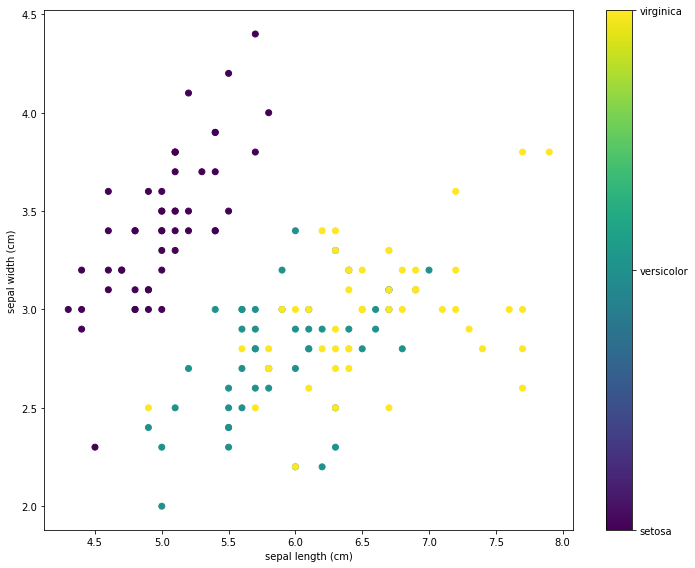

In [7]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(10, 8))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [9]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)

In [10]:
print(f"Accuracy of DescisionTreeClassifier is {accuracy_score(y_test, dtree_predictions)}")
print(f"Accuracy of DescisionTreeClassifier is {precision_score(y_test, dtree_predictions, average=None)}")
print(f"Accuracy of DescisionTreeClassifier is {recall_score(y_test, dtree_predictions, average=None)}")
print(f"Accuracy of DescisionTreeClassifier is {f1_score(y_test, dtree_predictions, average=None)}")

Accuracy of DescisionTreeClassifier is 0.8947368421052632
Accuracy of DescisionTreeClassifier is [1.         0.83333333 0.85714286]
Accuracy of DescisionTreeClassifier is [1.         0.9375     0.66666667]
Accuracy of DescisionTreeClassifier is [1.         0.88235294 0.75      ]


In [11]:
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  3,  6]])

In [13]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
accuracy
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [14]:
print(f"Accuracy of SVM is {accuracy_score(y_test, svm_predictions)}")
print(f"Accuracy of SVM is {precision_score(y_test, svm_predictions, average=None)}")
print(f"Accuracy of SVM is {recall_score(y_test, svm_predictions, average=None)}")
print(f"Accuracy of SVM is {f1_score(y_test, svm_predictions, average=None)}")

Accuracy of SVM is 0.9736842105263158
Accuracy of SVM is [1.  1.  0.9]
Accuracy of SVM is [1.     0.9375 1.    ]
Accuracy of SVM is [1.         0.96774194 0.94736842]


In [15]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)  

In [16]:
print(f"Accuracy of KNeighborsClassifier is {accuracy_score(y_test, knn_predictions)}")
print(f"Accuracy of KNeighborsClassifier is {precision_score(y_test, knn_predictions, average=None)}")
print(f"Accuracy of KNeighborsClassifier is {recall_score(y_test, knn_predictions, average=None)}")
print(f"Accuracy of KNeighborsClassifier is {f1_score(y_test, knn_predictions, average=None)}")

Accuracy of KNeighborsClassifier is 0.9736842105263158
Accuracy of KNeighborsClassifier is [1.  1.  0.9]
Accuracy of KNeighborsClassifier is [1.     0.9375 1.    ]
Accuracy of KNeighborsClassifier is [1.         0.96774194 0.94736842]


In [17]:
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [18]:
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test)

In [19]:
print(f"Accuracy of GaussianNB is {accuracy_score(y_test, gnb_predictions)}")
print(f"Accuracy of GaussianNB is {precision_score(y_test, gnb_predictions, average=None)}")
print(f"Accuracy of GaussianNB is {recall_score(y_test, gnb_predictions, average=None)}")
print(f"Accuracy of GaussianNB is {f1_score(y_test, gnb_predictions, average=None)}")

Accuracy of GaussianNB is 1.0
Accuracy of GaussianNB is [1. 1. 1.]
Accuracy of GaussianNB is [1. 1. 1.]
Accuracy of GaussianNB is [1. 1. 1.]


In [20]:
cm = confusion_matrix(y_test, gnb_predictions)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

## Neural network

In [21]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [48]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu', ))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax', ))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.fit(X, y, epochs=50, batch_size=5)

Epoch 1/50
150/150 [==============================] - 0s 688us/step - loss: 1.1088 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 212us/step - loss: 1.0882 - accuracy: 0.3867
Epoch 3/50
150/150 [==============================] - 0s 199us/step - loss: 1.0744 - accuracy: 0.3333
Epoch 4/50
150/150 [==============================] - 0s 204us/step - loss: 1.0625 - accuracy: 0.4333
Epoch 5/50
150/150 [==============================] - 0s 219us/step - loss: 1.0531 - accuracy: 0.5200
Epoch 6/50
150/150 [==============================] - 0s 194us/step - loss: 1.0401 - accuracy: 0.4533
Epoch 7/50
150/150 [==============================] - 0s 200us/step - loss: 1.0289 - accuracy: 0.4933
Epoch 8/50
150/150 [==============================] - 0s 212us/step - loss: 1.0131 - accuracy: 0.5267
Epoch 9/50
150/150 [==============================] - 0s 194us/step - loss: 0.9972 - accuracy: 0.5200
Epoch 10/50
150/150 [==============================] - 0s 210us/step - loss: 0.979

In [52]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

150/150 [==============================] - 0s 144us/step
Accuracy: 97.33


In [53]:
nn_predictions = model.predict_classes(X)

In [54]:
cm = confusion_matrix(y, nn_predictions)
cm

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  0, 50]])